# **📚 Goodreads Books - EDA with Visualization 📕📖**
***

<br/>
<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">1. Importing Datasets</span></div>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import collections
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading data
# use sep='\s*,\s*' so that you will take care of spaces in column-names --> there is a space in num_pages column-names
df = pd.read_csv('D:/Pedoman/Porto Folios/Goodreads Books/books.csv', sep=r'\s*,\s*', error_bad_lines = False) # Loading data
df.head() # Displaying the first 5 lines of the dataset

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25128\3655316801.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('D:/Pedoman/Porto Folios/Goodreads Books/books.csv', sep=r'\s*,\s*', error_bad_lines = False) # Loading data
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25128\3655316801.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('D:/Pedoman/Porto Folios/Goodreads Books/books.csv', sep=r'\s*,\s*', error_bad_lines = False) # Loading data
Skipping line 3350: Expected 12 fields in line 3350, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 4704: Expected 12 fields in line 4704, saw 13. Error could possibly be

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


<span style="font-size:16px;">b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'</span>

<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">2. Data Description</span></div>

In [3]:
# Let's look at the dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 11123 records and 12 columns.


In [4]:
# Get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
# Data type of each columns
print(df.dtypes)

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object


<br/>
<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">3. Data Wrangling</span></div>

In [6]:
# Checking the unique values
df.nunique()

bookID                11123
title                 10348
authors                6639
average_rating          209
isbn                  11123
isbn13                11123
language_code            27
num_pages               997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2291
dtype: int64

In [7]:
# Checking the Duplicates
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)

(11123, 12)


In [8]:
# Check the number of missing values in each column
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

> <span style="font-size:16px;">The data has no missing values, so no further transformations are required.</span>

In [9]:
# Check duplicate values
df.duplicated().sum()

0

> <span style="font-size:16px;">The data has no duplicate values, so no further transformations are required.</span>

<br/>
<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">4. Exploratory Data Analysis (EDA)</span></div>

In [10]:
# Display summary statistical
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<span style="font-size:16px;">From the above results, we can see that our our ratings all lie between 0 and 5. We get know more about the other columns as well, such as the mean of average ratings and some other information that might help us in the future steps. We also checked the data types of each column and also saw that there are no null values present in our data.</span>

In [11]:
# Top 10 Highest Rated Books
top_books = df[df['ratings_count'] > 1000000]
top_books.sort_values(by='average_rating', ascending=False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.1. Top 10 Highest Rated Books</span>

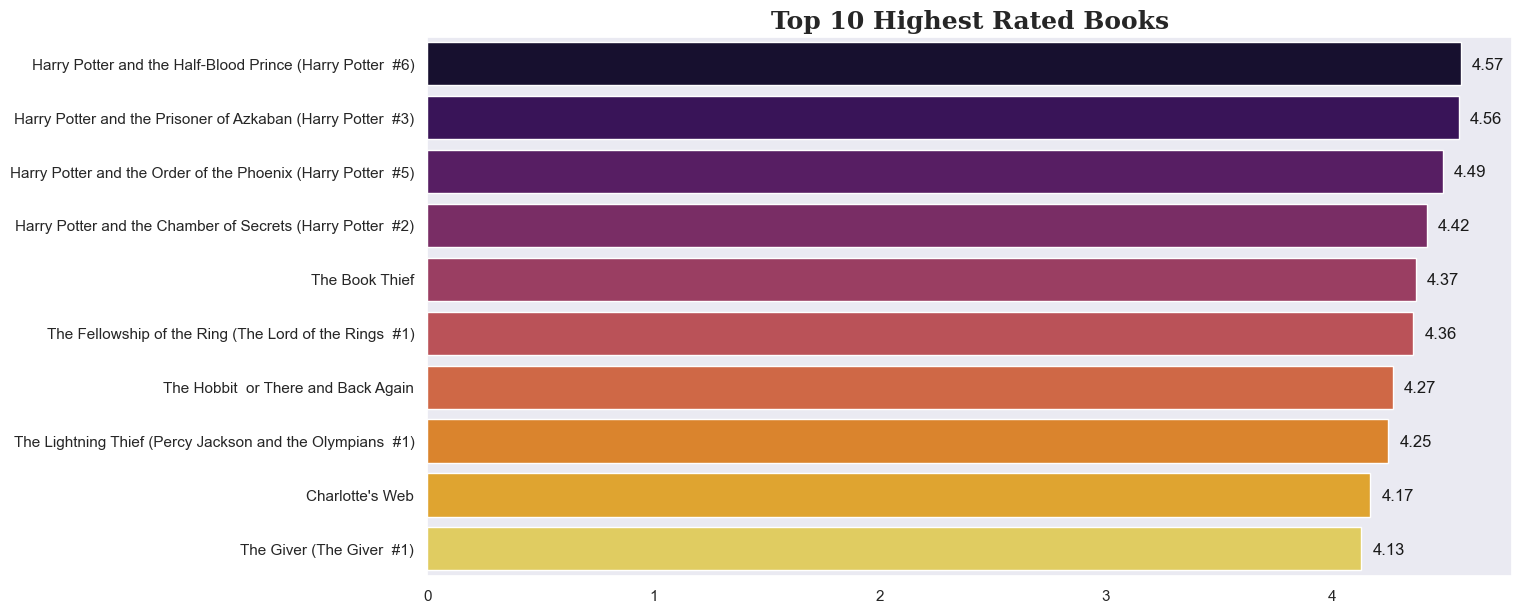

In [33]:
# Visualize Top 10 Highest Rated Books
top_books = top_books.sort_values(by='average_rating', ascending=False).head(10)
sns.set(rc = {'figure.figsize': (14, 7)})
ax = sns.barplot(data=top_books, x="average_rating", y="title", palette="inferno")
ax.set_title("Top 10 Highest Rated Books", fontfamily='serif', fontsize=18, fontweight='bold')
ax.set(xlabel=None, ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 12, color = 'k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.2. Top 10 Highest Voted Books</span>

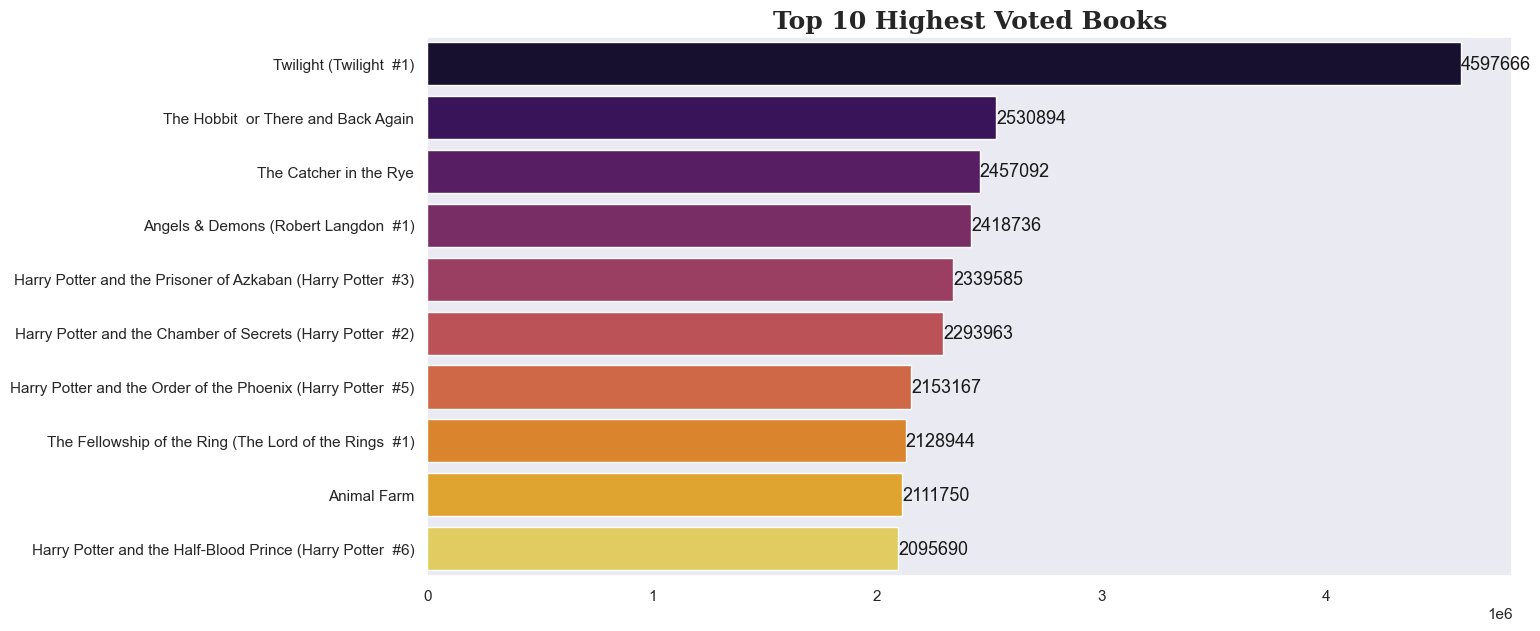

In [13]:
# Top 10 Highest Voted Books
top_reviewed = df.sort_values(by='ratings_count', ascending=False).head(10)
sns.set(rc = {'figure.figsize': (14, 7)})
ax = sns.barplot(data=top_reviewed, x="ratings_count", y="title", palette="inferno")
ax.set_title("Top 10 Highest Voted Books", fontfamily='serif', fontsize=18, fontweight='bold')
ax.set(xlabel=None, ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().astype('int')), fontsize = 13, color = 'k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.3. The Most Popular Authors</span>

In [14]:
# The Most Popular Authors (matrix  use = total_books * mean of average_rating)
popular_authors = df.groupby('authors').agg({'average_rating':'mean', 'title': 'count'}).rename({'title': 'total_books'}, axis = 1)
popular_authors['total_rating'] =  popular_authors['total_books'] * popular_authors['average_rating']
popular_authors.sort_values(['total_rating'], ascending = (False)).head(10)

,average_rating,total_books,total_rating
authors,,,
P.G. Wodehouse,4.147250,40,165.89
Rumiko Takahashi,4.186667,39,163.28
Stephen King,3.973500,40,158.94
Orson Scott Card,3.779143,35,132.27
Agatha Christie,3.989091,33,131.64
Mercedes Lackey,4.039310,29,117.14
Piers Anthony,3.716667,30,111.50
Dick Francis,3.962143,28,110.94
Sandra Brown,3.742069,29,108.52


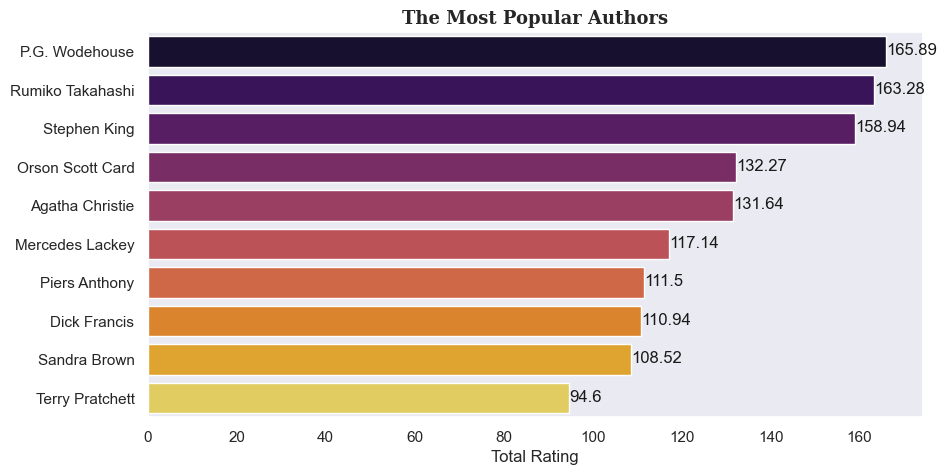

In [34]:
# Visualize The Most Popular Authors (matrix  use = total_books * mean of average_rating)
popular_authors = popular_authors.sort_values(['total_rating'], ascending = (False)).head(10).reset_index()
sns.set(rc = {'figure.figsize': (10, 5)})
ax = sns.barplot(data=popular_authors, x="total_rating", y="authors", palette="inferno")
ax.set_title("The Most Popular Authors", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Total Rating', ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().round(2)), fontsize = 12, color = 'k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.4. Top 10 Highest Rated Authors</span>

In [18]:
# Top 10 Highest Rated Authors - mean of average_rating above 4.4 (matrix  use = total_books * mean of average_rating)
highly_rated_authors = df.groupby('authors').agg({'average_rating':'mean', 'title': 'count'}).rename({'title': 'total_books'}, axis = 1)
highly_rated_authors = highly_rated_authors[highly_rated_authors['average_rating']>4.4]
highly_rated_authors['total_rating'] = highly_rated_authors['total_books'] * highly_rated_authors['average_rating']
highly_rated_authors.sort_values(['total_rating'], ascending = (False)).head(10)

,average_rating,total_books,total_rating
authors,,,
Hiromu Arakawa/Akira Watanabe,4.565833,12,54.79
J.K. Rowling,4.513636,11,49.65
Hiromu Arakawa/荒川弘/方郁仁,4.556250,8,36.45
Bill Watterson,4.708571,7,32.96
J.K. Rowling/Mary GrandPré,4.548333,6,27.29
Hiromu Arakawa,4.548000,5,22.74
Karen Kingsbury/Gary Smalley,4.444000,5,22.22
Warren Ellis/Darick Robertson/Rodney Ramos,4.457500,4,17.83
Chie Shinohara,4.445000,4,17.78


C:\WINDOWS\system32\hoki_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from current font.
  func(*args, **kwargs)
C:\WINDOWS\system32\hoki_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  func(*args, **kwargs)
C:\WINDOWS\system32\hoki_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from current font.
  func(*args, **kwargs)
C:\WINDOWS\system32\hoki_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  func(*args, **kwargs)
C:\WINDOWS\system32\hoki_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37057 (\N{CJK UNIFIED IDEOGRAPH-90C1}) missing from current font.
  func(*args, **kwargs)
C:\WINDOWS\system32\hoki_env\lib\site-packages\IPython\core\events.py:89: UserWarning

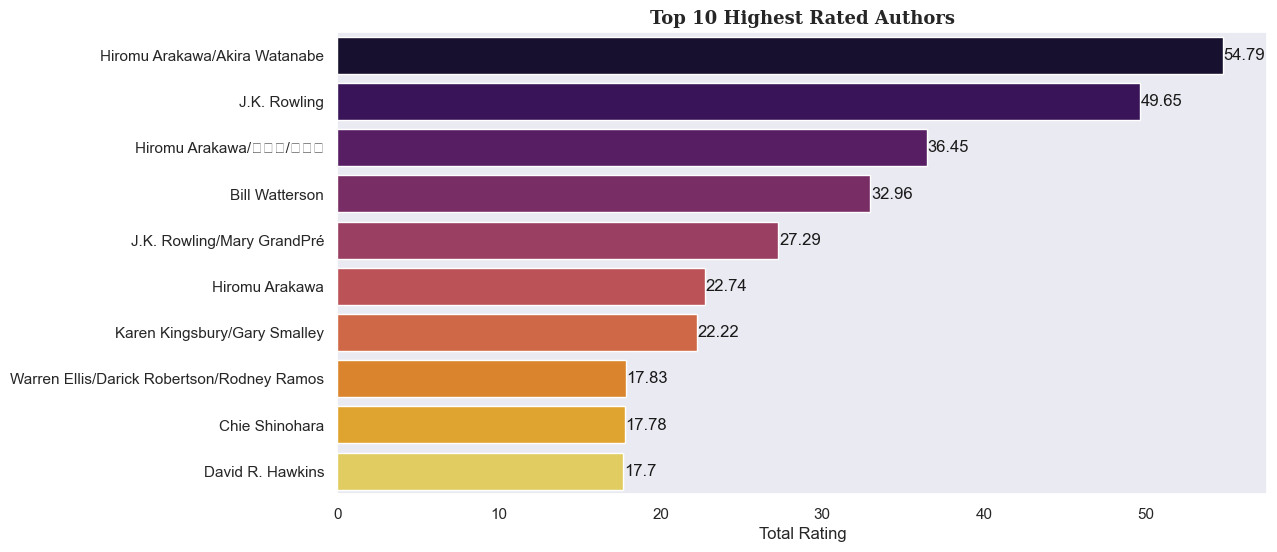

In [20]:
# Visualize Top 10 Highest Rated Authors
highly_rated_authors = highly_rated_authors.sort_values(['total_rating'], ascending = (False)).head(10).reset_index()
sns.set(rc = {'figure.figsize': (12, 6)})
ax = sns.barplot(data=highly_rated_authors, x="total_rating", y="authors", palette="inferno")
ax.set_title("Top 10 Highest Rated Authors", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Total Rating', ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().round(2)), fontsize = 13, color = 'k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.5. Top 10 Authors With Most Books</span>

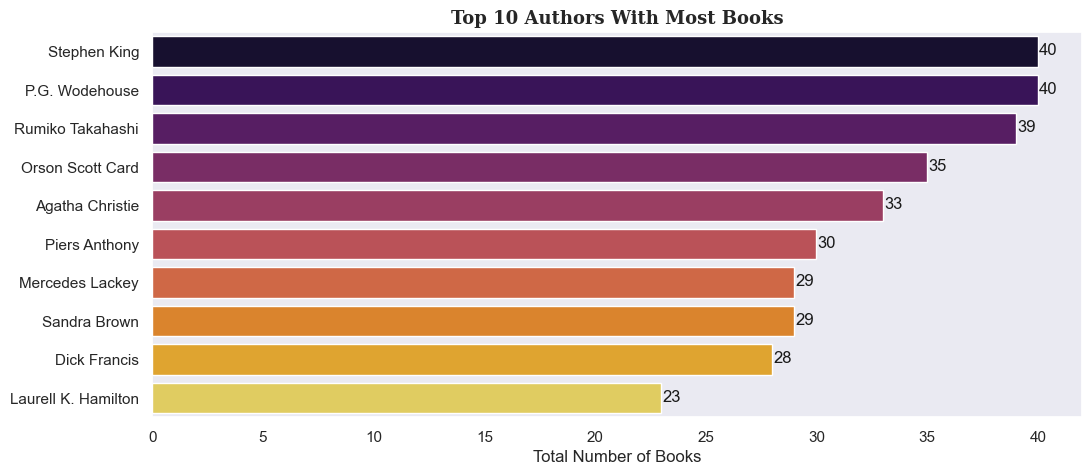

In [21]:
# Top 10 Authors With Most Books
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10)
sns.set(rc = {'figure.figsize': (12, 5)})
ax = sns.barplot(data=most_books, x="title", y="authors", palette="inferno")
ax.set_title("Top 10 Authors With Most Books", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Total Number of Books', ylabel=None)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(round(i.get_width())), fontsize = 12, color = 'k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.6. Top 10 Longest Books (By Page Count)</span>

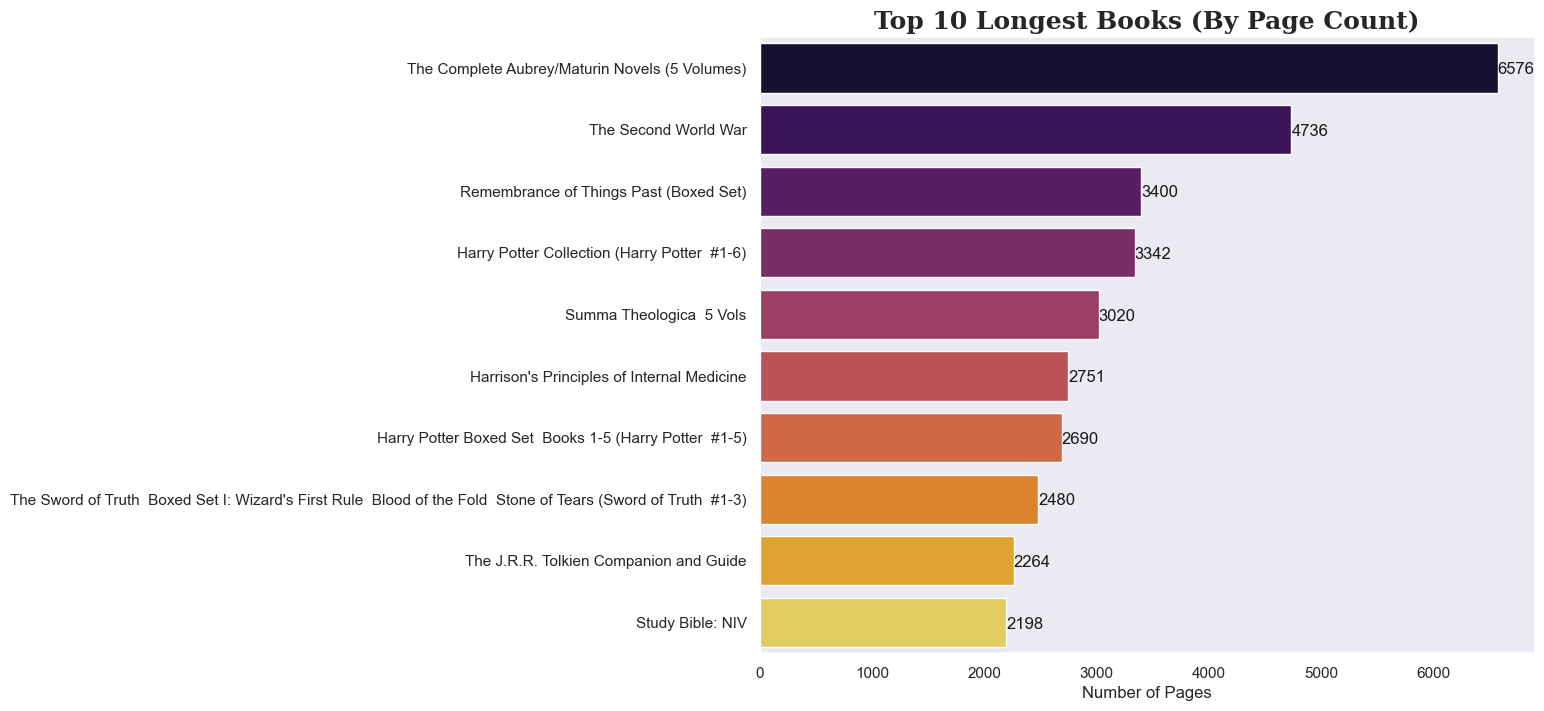

In [22]:
# Top 10 Longest Books (By Page Count)
longest_books = df.sort_values(by='num_pages', ascending=False).head(10)
sns.set(rc = {'figure.figsize': (10, 8)})
ax = sns.barplot(data=longest_books, x="num_pages", y="title", palette="inferno")
ax.set_title("Top 10 Longest Books (By Page Count)", fontfamily='serif', fontsize=18, fontweight='bold')
ax.set(xlabel='Number of Pages', ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(round(i.get_width())), fontsize = 12, color = 'k')
ax.grid(False)
plt.show()

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.7. The Most Popular Publishers</span>

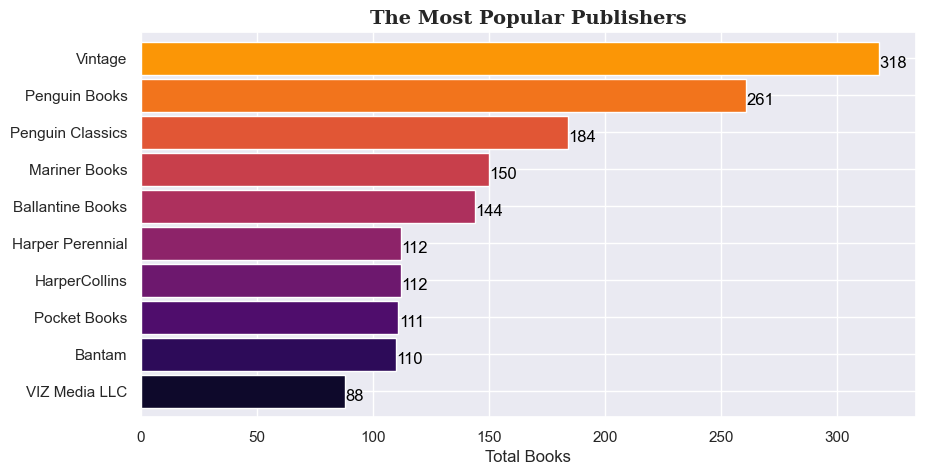

In [36]:
# The Most Popular Publishers
top_publishers = df.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(10, 5))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_title("The Most Popular Publishers", fontfamily='serif', fontsize=14, fontweight='bold')
ax.set(xlabel='Total Books', ylabel=None)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=12, color='black')
plt.show()

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.8. Book Language Distribution</span>

[Text(0.5, 0, 'Language'), Text(0, 0.5, '')]

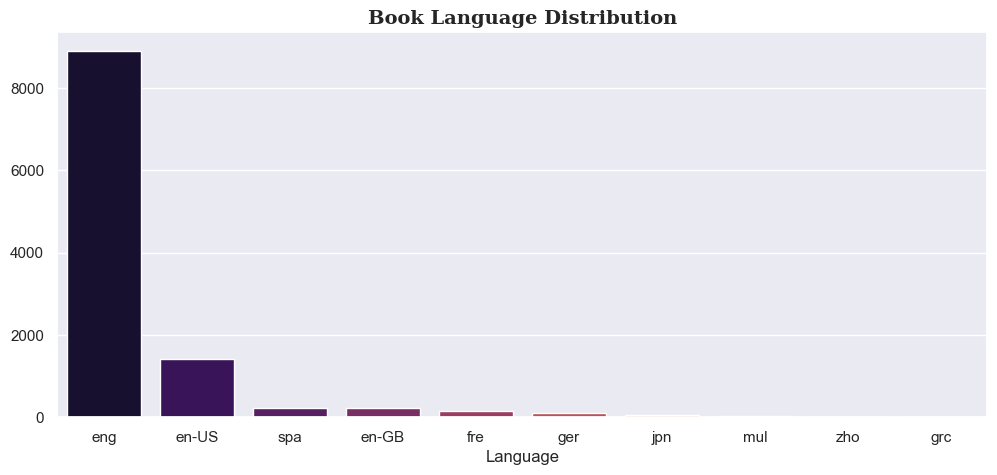

In [24]:
# Book Language Distribution
plt.figure(1, figsize=(12,5))
ax = sns.countplot(x = "language_code", order=df['language_code'].value_counts().index[0:10] ,data=df,palette='inferno')
ax.set_title("Book Language Distribution", fontfamily='serif', fontsize=14, fontweight='bold')
ax.set(xlabel='Language', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.9. Average Rating Distribution</span>

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, '')]

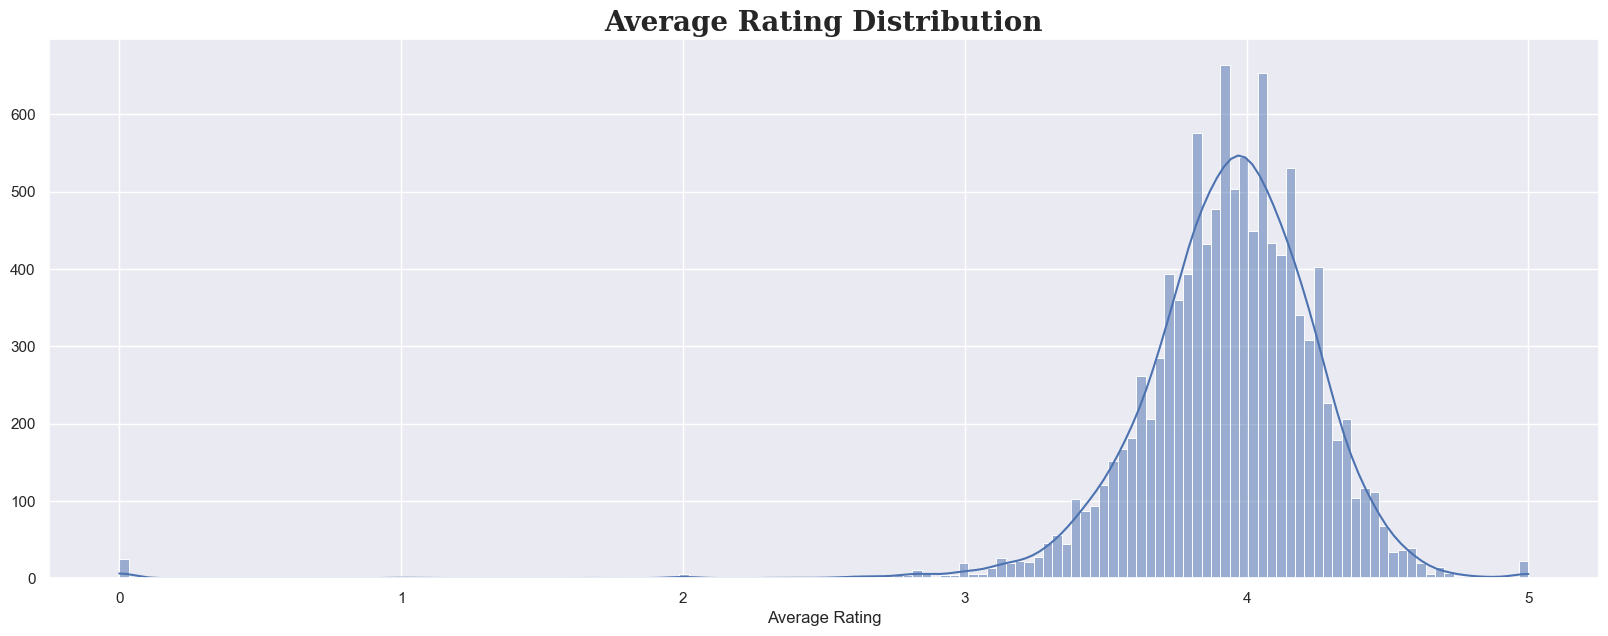

In [25]:
# Average Rating Distribution
df.average_rating = df.average_rating.astype(float)
sns.set(rc = {'figure.figsize': (20, 7)})
ax = sns.histplot(data=df['average_rating'], kde=True)
ax.set_title("Average Rating Distribution", fontfamily='serif', fontsize=20, fontweight='bold')
ax.set(xlabel='Average Rating', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.10. Number of Pages Distribution</span>

[Text(0.5, 0, 'Number of Pages'), Text(0, 0.5, '')]

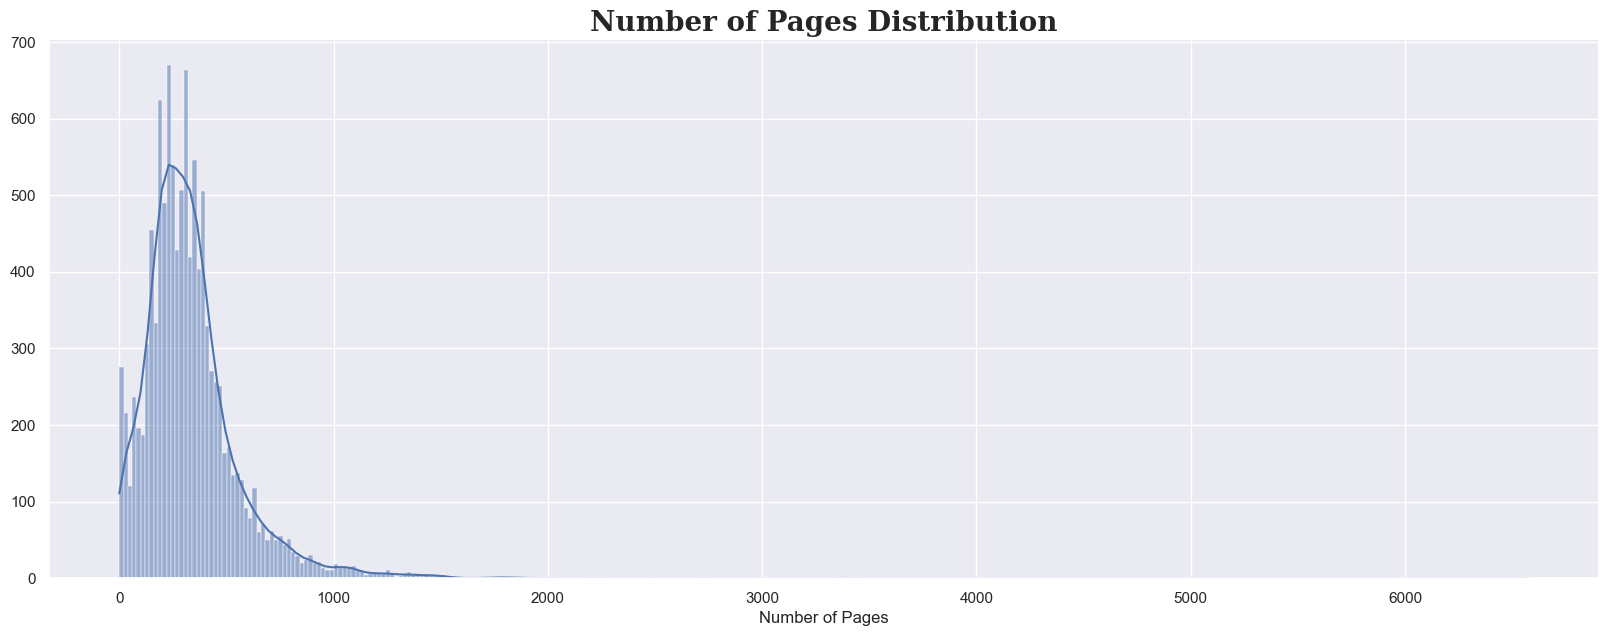

In [26]:
# Number of Pages Distribution
sns.set(rc = {'figure.figsize': (20, 7)})
ax = sns.histplot(data=df['num_pages'], kde=True)
ax.set_title("Number of Pages Distribution", fontfamily='serif', fontsize=20, fontweight='bold')
ax.set(xlabel='Number of Pages', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.11. Correlation Between Rating Counts and Average Rating</span>

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Ratings Count')]

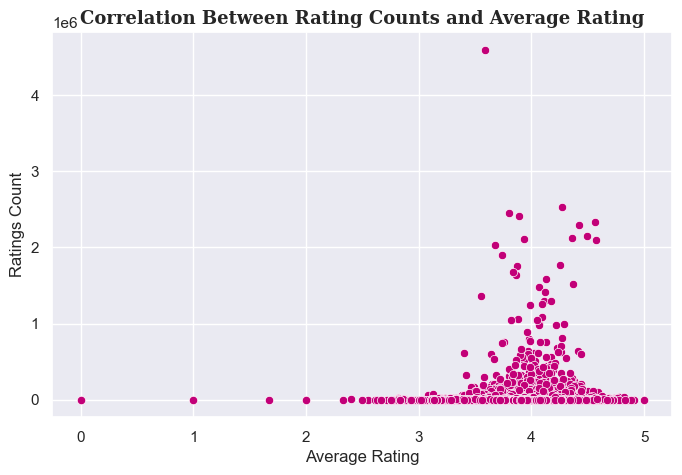

In [28]:
# Correlation Between Rating Counts and Average Rating
sns.set(rc = {'figure.figsize': (8, 5)})
ax = sns.scatterplot(data=df, x="average_rating", y="ratings_count", color="#c20078")
ax.set_title("Correlation Between Rating Counts and Average Rating", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Average Rating', ylabel='Ratings Count')

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.12. Correlation Between Number of Pages and Average Rating</span>

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Number of Pages')]

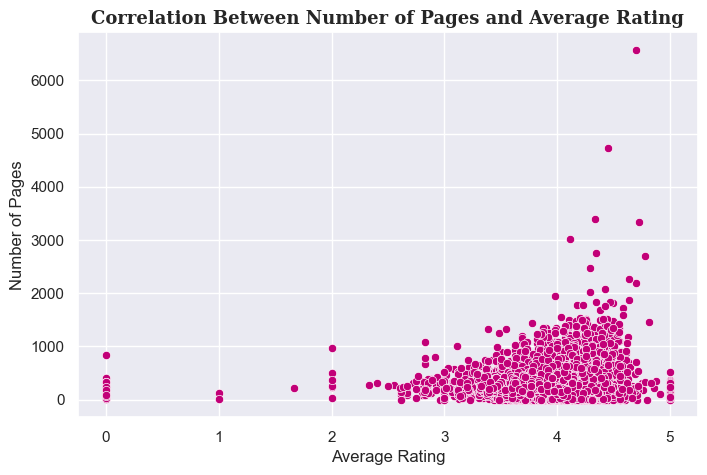

In [29]:
# Correlation Between Number of Pages and Average Rating
sns.set(rc = {'figure.figsize': (8, 5)})
ax = sns.scatterplot(data=df, x="average_rating", y="num_pages", color="#c20078")
ax.set_title("Correlation Between Number of Pages and Average Rating", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Average Rating', ylabel='Number of Pages')

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.13. Correlation Between Languages and Average Rating</span>

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Languages')]

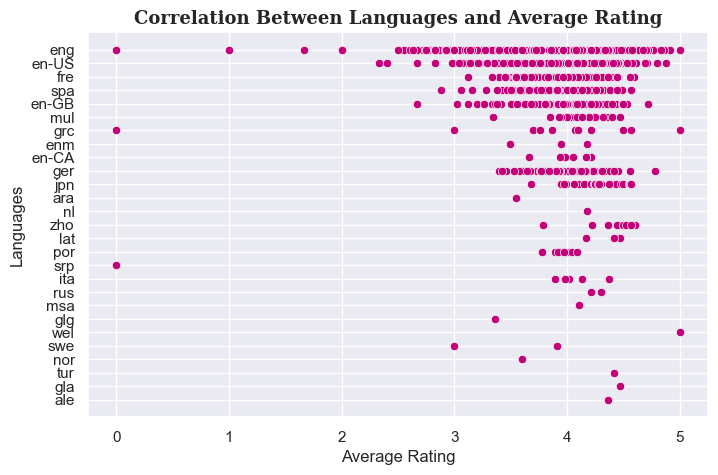

In [30]:
# Correlation Between Languages and Average Rating
sns.set(rc = {'figure.figsize': (8, 5)})
ax = sns.scatterplot(data=df, x="average_rating", y="language_code", color="#c20078")
ax.set_title("Correlation Between Languages and Average Rating", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Average Rating', ylabel='Languages')

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.14. Correlation Between Text Reviews Count and Average Rating</span>

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Text Reviews Count')]

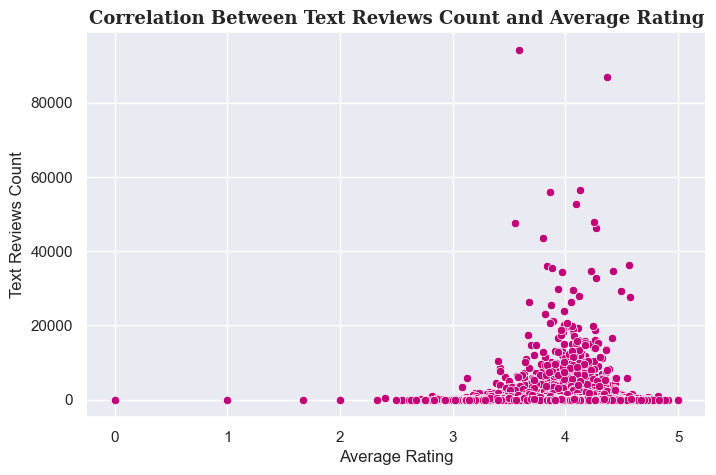

In [31]:
# Correlation Between Text Reviews Count and Average Rating
sns.set(rc = {'figure.figsize': (8, 5)})
ax = sns.scatterplot(data=df, x="average_rating", y="text_reviews_count", color="#c20078")
ax.set_title("Correlation Between Text Reviews Count and Average Rating", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel='Average Rating', ylabel='Text Reviews Count')